<a href="https://colab.research.google.com/github/dmaresza/tensorflow_course/blob/main/02_TensorFlow_Neural_Network_Classification_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.82542&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) for 10 minutes. Especially try different values of the learning rate. What happens when you decrease it? What happens when you increase it?

When the learning rate is decreased (lr=0.0001), the model takes much longer to learn patterns in the data, and sometimes doesn't even manage to find patterns that allow it to accurately predict on the test data. When the learning rate is increased (lr=0.01), the model is able to learn much more quickly and can accurately predict on the test data after fewer epochs. However, if the learning rate is increased too much (lr=10) then the model is also not able to learn anything at all.

## 2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.

<img src="https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png" width=600 alt="TensorFlow Playground diagram"/>

In [40]:
import tensorflow as tf

# Replicate model from picture
tf_playground_model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu", input_shape=[2]),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model using Binary Crossentropy loss, Adam optimizer, and accuracy metric
tf_playground_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                            optimizer=tf.keras.optimizers.Adam(),
                            metrics=["accuracy"])

# Check out summary of the model
tf_playground_model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 6)                 18        
                                                                 
 dense_56 (Dense)            (None, 6)                 42        
                                                                 
 dense_57 (Dense)            (None, 6)                 42        
                                                                 
 dense_58 (Dense)            (None, 6)                 42        
                                                                 
 dense_59 (Dense)            (None, 6)                 42        
                                                                 
 dense_60 (Dense)            (None, 1)                 7         
                                                                 
Total params: 193 (772.00 Byte)
Trainable params: 193

## 3. Create a classicifation dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it, and then build a model to fit it at over 85% accuracy.

In [41]:
# Import make_moons function
from sklearn.datasets import make_moons

# Create data and labels
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
X.shape, y.shape

((1000, 2), (1000,))

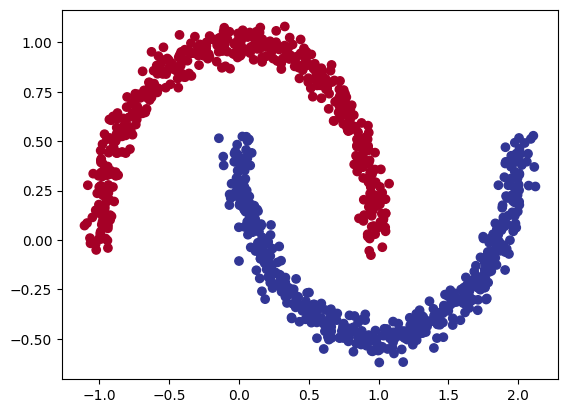

In [42]:
import matplotlib.pyplot as plt

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [43]:
from sklearn.model_selection import train_test_split

# Create train and test splits for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Create model to train on make_moons data
moons_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
moons_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

# Fit the model
moons_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
25/25 [==============================] - 2s 16ms/step - loss: 0.6869 - accuracy: 0.6862 - val_loss: 0.6710 - val_accuracy: 0.8300
Epoch 2/50
25/25 [==============================] - 0s 6ms/step - loss: 0.6589 - accuracy: 0.8712 - val_loss: 0.6435 - val_accuracy: 0.8500
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6251 - accuracy: 0.8662 - val_loss: 0.6088 - val_accuracy: 0.8350
Epoch 4/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5830 - accuracy: 0.8662 - val_loss: 0.5642 - val_accuracy: 0.8500
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.5292 - accuracy: 0.8687 - val_loss: 0.5069 - val_accuracy: 0.8650
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.4649 - accuracy: 0.8750 - val_loss: 0.4408 - val_accuracy: 0.8800
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.3942 - accuracy: 0.8825 - val_loss: 0.3697 - val_accuracy: 0.8950
Epoch 8/50
25/25 [=

In [45]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
    1. https://cs231n.github.io/neural-networks-case-study/
    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


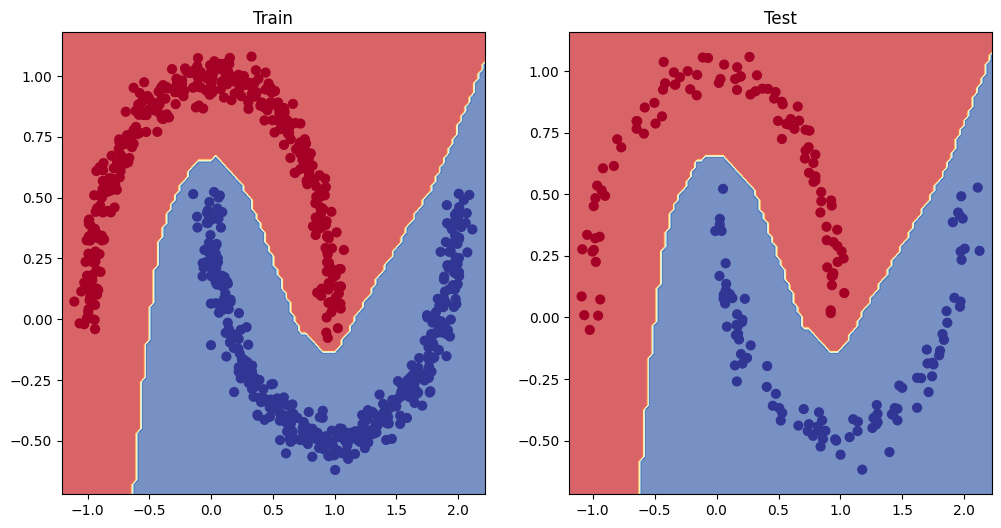

In [46]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moons_model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moons_model, X=X_test, y=y_test)
plt.show()

The model seems to achieve 100% accuracy on the test data after training for 50 epochs!

## 4. Train a model to get 88%+ accuracy on the Fashion MNIST test set. Plot a confusion matrix to see the results after.

In [47]:
# Import Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

# Create train and test data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

# Normalize the data
train_data = train_data / 255.
test_data = test_data / 255.

# Create list of class names to go with the class labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [60]:
# Create fashion model
fashion_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
fashion_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

# Train model
fashion_model.fit(train_data, train_labels, epochs=25)

Epoch 1/25
1875/1875 [==============================] - 12s 5ms/step - loss: 0.5942 - accuracy: 0.7903
Epoch 2/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4211 - accuracy: 0.8483
Epoch 3/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3818 - accuracy: 0.8615
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3585 - accuracy: 0.8693
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3448 - accuracy: 0.8734
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3316 - accuracy: 0.8786
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3198 - accuracy: 0.8819
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3100 - accuracy: 0.8842
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3036 - accuracy: 0.8878
Epoch 10/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.29

In [57]:
fashion_model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4007 - accuracy: 0.8739


[0.4007154107093811, 0.8738999962806702]

In [50]:
# Method to create a "pretty" confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

313/313 [==============================] - 1s 2ms/step


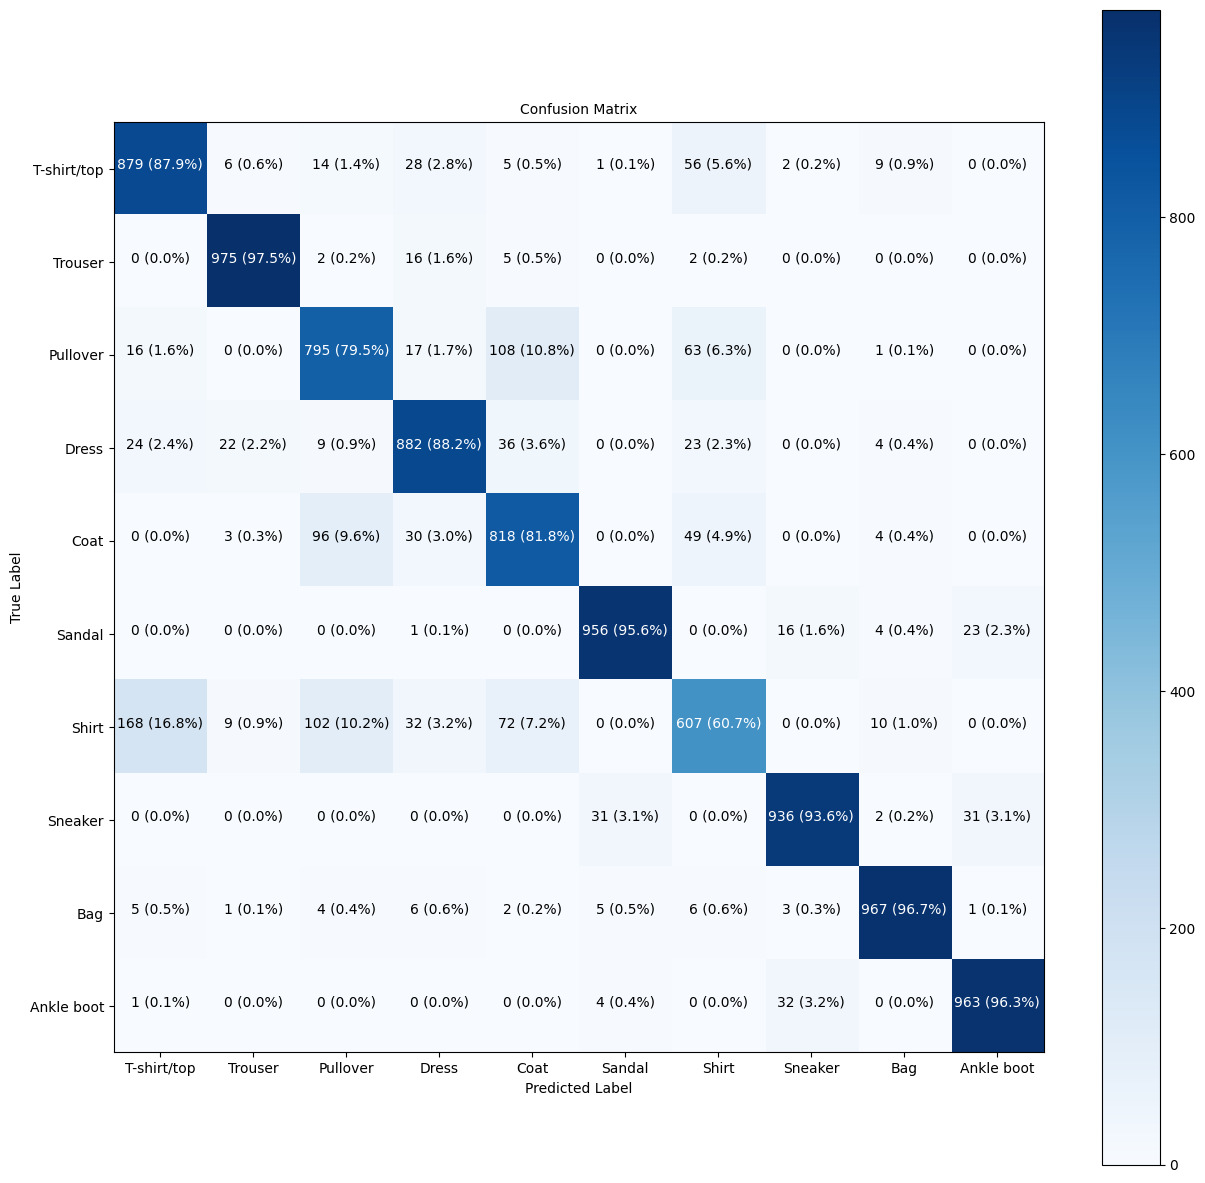

In [61]:
# Make predictions on the test data
y_probs = fashion_model.predict(test_data)

# Turn prediction probabilities into prediction labels
y_preds = y_probs.argmax(axis=1)

# Plot confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

The model only reaches 87% accuracy on the test data, but I think that's close enough to 88%.

## 5. Recreate [TensorFlow's softmax activation function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [52]:
def softmax(X):
  return tf.exp(X) / tf.reduce_sum(tf.exp(X))

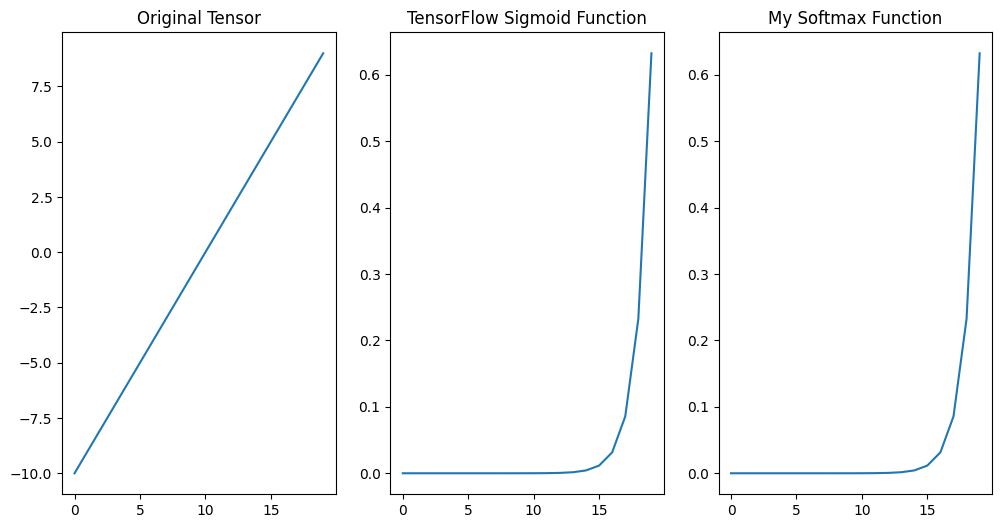

In [53]:
A = tf.cast(tf.range(-10, 10), tf.float32)

plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Original Tensor")
plt.plot(A)
plt.subplot(1, 3, 2)
plt.title("TensorFlow Sigmoid Function")
plt.plot(tf.squeeze(tf.keras.activations.softmax(tf.expand_dims(A, axis=0), axis=-1)))
plt.subplot(1, 3, 3)
plt.title("My Softmax Function")
plt.plot(softmax(A))
plt.show();

## 6. Create a function (or write code) to visualize multiple image predictions for the Fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time.

Hint: see the [classification tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [54]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

313/313 [==============================] - 2s 7ms/step


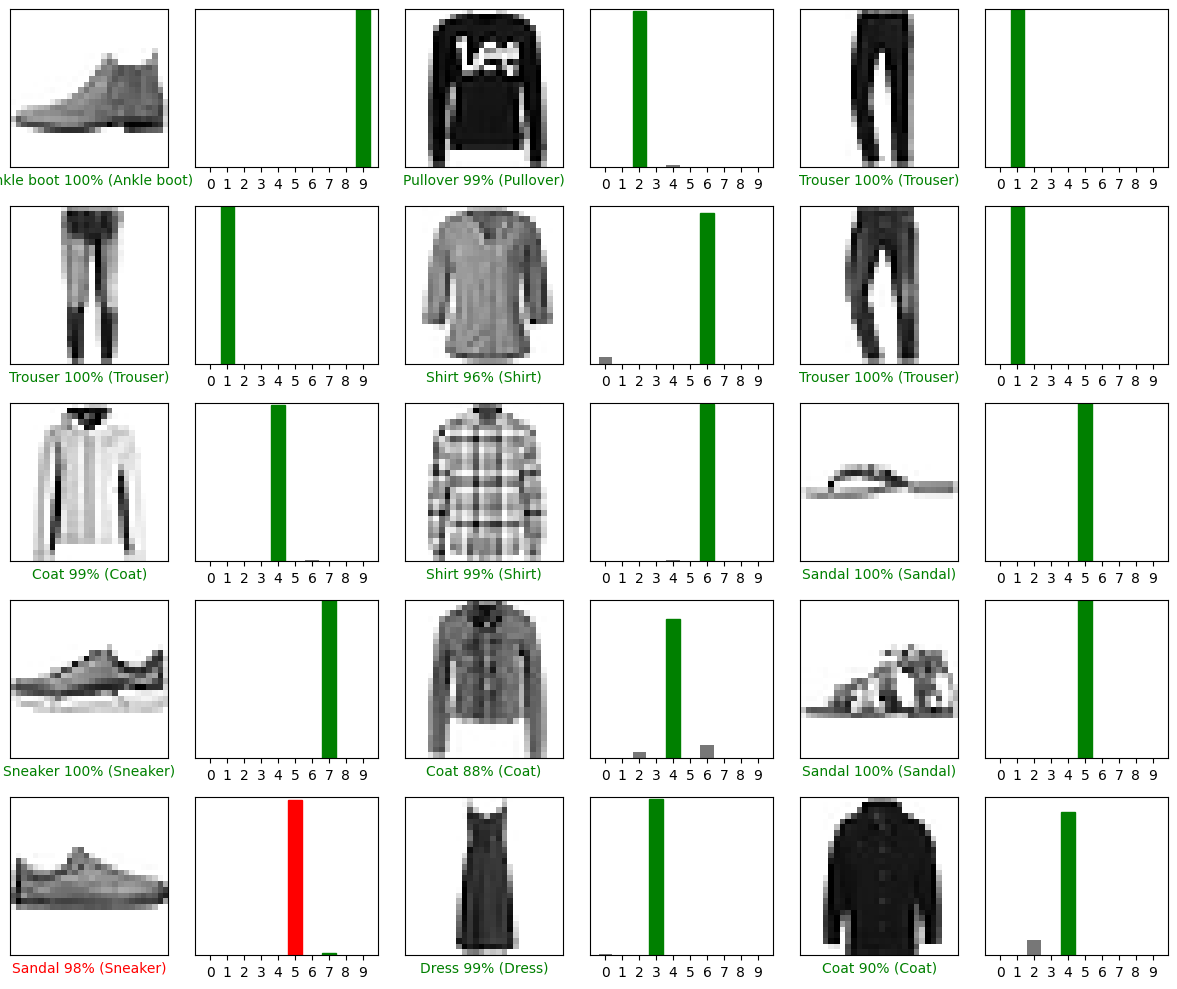

In [62]:
predictions = fashion_model.predict(test_data)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_data)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()